In [46]:
"""
AGN구분(strong vs. weak - [OIII], seyfert vs. LINERs), sigma5 계산, binning 얇게(redshift에 따라서) AGN 비율(AGN fraction) 변화 있는지
Cluster environment vs. Field environment
"""
print("Binning")

Binning


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.cosmology import WMAP9 as cosmo

In [48]:
# flux [erg/s/cm^2]
d = np.genfromtxt('GU2_TP_third.csv', dtype='str', delimiter=',')
print(d[0])
dtype = [((d[0][i]), '<f8') for i in range(len(d[0]))]
data0 = np.genfromtxt('GU2_TP_third.csv', dtype=dtype, delimiter=',', skip_header=1)

['specObjID' 'z' 'z_err' 'ra' 'dec' 'petroMag_g' 'petroMag_r' 'petroMag_i'
 'h_alpha_flux' 'h_alpha_flux_err' 'h_beta_flux' 'h_beta_flux_err'
 'oiii_5007_flux' 'oiii_5007_flux_err' 'oi_6300_flux' 'oi_6300_flux_err'
 'nii_6584_flux' 'nii_6584_flux_err' 'sii_6717_flux' 'sii_6717_flux_err'
 'sii_6731_flux' 'sii_6731_flux_err' 'h_delta_flux' 'h_delta_flux_err']


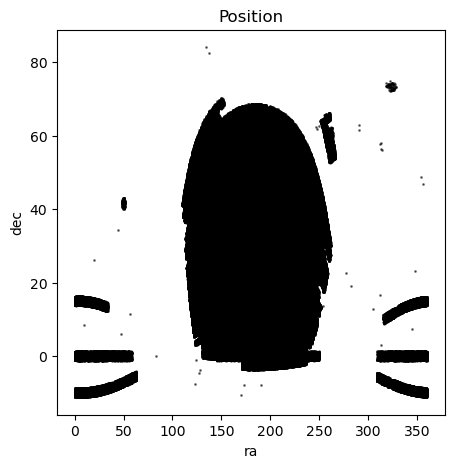

In [49]:
ra0 = data0['ra']
dec0 = data0['dec']

plt.figure(figsize=(5,5))
plt.scatter(ra0, dec0, c='k', s=1, alpha=0.5)
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Position')
plt.show()

C:\Users\seohyun\AppData\Local\Temp\ipykernel_10916\707661114.py:4: RuntimeWarning: invalid value encountered in log10
  Mr0 = r_mag0 - 5.0 * np.log10(dL0) - 25.0


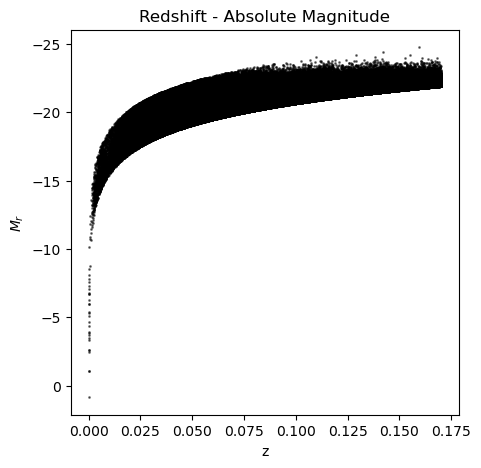

In [50]:
z0 = data0['z']
r_mag0 = data0['petroMag_r']
dL0 = cosmo.luminosity_distance(z0).value
Mr0 = r_mag0 - 5.0 * np.log10(dL0) - 25.0

plt.figure(figsize=(5,5))
plt.scatter(z0, Mr0, c='k', s=1, alpha=0.5)
plt.gca().invert_yaxis()
plt.xlabel('z')
plt.ylabel('$M_r$')
plt.title('Redshift - Absolute Magnitude')
plt.show()

In [51]:
print(len(data0['specObjID']))
print(np.where(dL0 <= 0)[0])
print(dL0[np.where(dL0 <= 0)[0]])

407557
[     0      1      2      3      4      5      6      7      8      9
     10     11     12     13     14     15     16     17     18     19
     20     21     22     23     24     25     26     27     28     29
     30     31     32     33     34     35     36     37   2014   2015
   2016   2017   2018   2019   2020   2021   2022   2023   2024   2025
   2026 230075 231086 231373 232184 233107 245126 246871 248071 258330
 259701 260495 265959 276490 280408 283768 284717 286045 286836 288165
 296853 302773 324248 324624 326586 327059 330967 331118 336260 336379
 336858 342491 345106 346900 349739 354462 363236 363803 365697 366248
 367466 369272 369906 372395 379146 379228 383056 389548 393745 398766
 405877 406470]
[-4.67504000e+00 -3.24510832e+00 -1.99153480e+00 -1.90259805e+00
 -1.83213540e+00 -1.57744021e+00 -1.48716179e+00 -1.38439550e+00
 -1.35012712e+00 -1.29219837e+00 -1.27462814e+00 -1.24920241e+00
 -1.24332081e+00 -1.22321146e+00 -1.21178574e+00 -1.21148227e+00
 -1.184

In [52]:
# criteria
cri_mr = data0['petroMag_r'] < 17.77

z0 = data0['z']
dL0 = cosmo.luminosity_distance(z0).value
Mr0 = data0['petroMag_r'] - 5 * np.log10(dL0) - 25
Mr_limit = 17.77 - 5 * np.log10(np.max(dL0)) - 25
cri_Mr = Mr0 < Mr_limit

cri_dL = dL0 > 0
cri_nona = data0['h_alpha_flux'] != 0
cri_nonb = data0['h_beta_flux'] != 0
cri_nond = data0['h_delta_flux'] != 0

cri = cri_mr & cri_Mr & cri_dL & cri_nona & cri_nonb & cri_nond
data = data0[cri]
print(len(data0['specObjID']), 'to', len(data['specObjID']))
print(f"Mr limit : {Mr_limit}")

407557 to 82517
Mr limit : -21.819396214977044


C:\Users\seohyun\AppData\Local\Temp\ipykernel_10916\1463532976.py:6: RuntimeWarning: invalid value encountered in log10
  Mr0 = data0['petroMag_r'] - 5 * np.log10(dL0) - 25


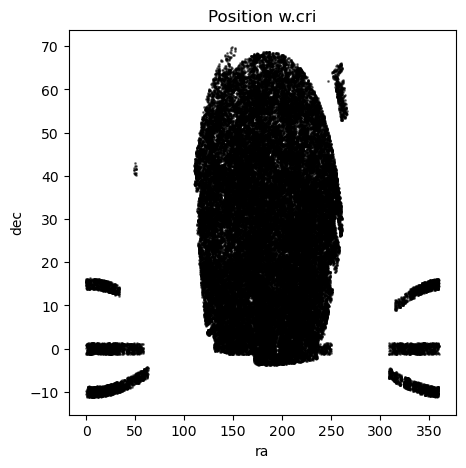

In [53]:
ra = data['ra']
dec = data['dec']

plt.figure(figsize=(5,5))
plt.scatter(ra, dec, c='k', s=1, alpha=0.5)
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Position w.cri')
plt.show()

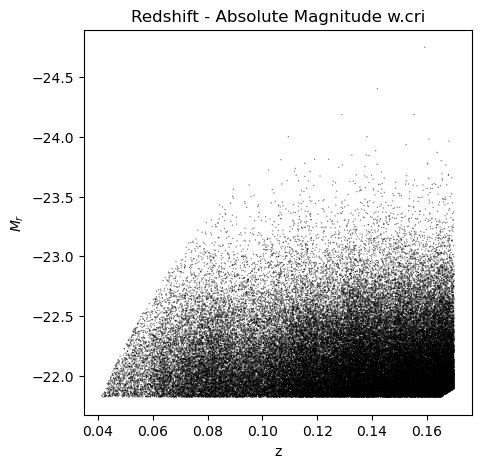

In [54]:
z = data['z']
r_mag = data['petroMag_r']
dL = cosmo.luminosity_distance(z).value
Mr = r_mag - 5.0 * np.log10(dL) - 25.0

fig = plt.figure(figsize=(5,5))
plt.scatter(z, Mr, c='k', s=1, alpha=0.5, edgecolor='None')
plt.gca().invert_yaxis()
plt.xlabel('z')
plt.ylabel('$M_r$')
plt.title('Redshift - Absolute Magnitude w.cri')
plt.show()

In [55]:
# 'h_alpha_flux' 'h_beta_flux' 'oiii_5007_flux' 'oi_6300_flux' 'nii_6584_flux' 'sii_6717_flux' 'sii_6731_flux' 'h_delta_flux'

oiii = data['oiii_5007_flux']
nii = data['nii_6584_flux']
siiw = data['sii_6717_flux']
siis = data['sii_6731_flux']
oi = data['oi_6300_flux']
ha = data['h_alpha_flux']
hb = data['h_beta_flux']
hd = data['h_delta_flux']

In [56]:
cri_mon1 = oiii / hb > 0
cri_mon2 = nii / ha > 0
cri_mon = cri_mon1 & cri_mon2

print(len(oiii), len(oiii[cri_mon]))

82517 67416


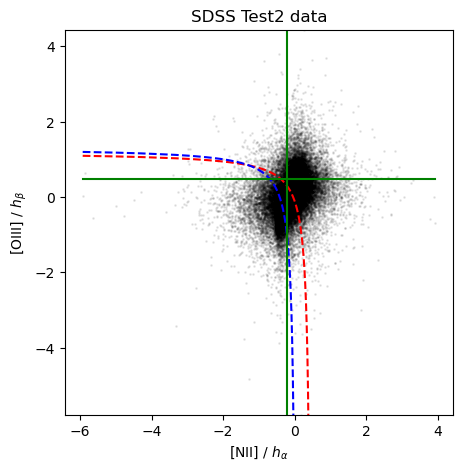

In [57]:
oiii_hb = np.log10(oiii[cri_mon] / hb[cri_mon])
nii_ha = np.log10(nii[cri_mon] / ha[cri_mon])

xline_nii_ha = nii_ha[nii_ha < 0.47]
yline_nii_ha = 0.61 / (nii_ha[nii_ha < 0.47] - 0.47) + 1.19
s = xline_nii_ha.argsort()
x_nii_ha = xline_nii_ha[s]
y_nii_ha = yline_nii_ha[s]

xline2_nii_ha = nii_ha[nii_ha < 0.05]
yline2_nii_ha = 0.61 / (nii_ha[nii_ha < 0.05] - 0.05) + 1.3
s = xline2_nii_ha.argsort()
x2_nii_ha = xline2_nii_ha[s]
y2_nii_ha = yline2_nii_ha[s]

plt.figure(figsize=(5,5))
plt.scatter(nii_ha, oiii_hb, c='k', s=1, alpha=0.08)
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')
plt.ylim(min(oiii_hb), max(oiii_hb))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.show()

In [58]:
# Seyferts vs. LINERs
agn = []
for i in range(len(nii_ha)):
    if oiii_hb[i] > 0.61 / (nii_ha[i] - 0.47) + 1.19 or nii_ha[i] > 0.47:
        agn.append(i)

sey1 = nii_ha[agn] > np.log10(0.6)
sey2 = oiii_hb[agn] > np.log10(3)
sey = sey1 & sey2
print(sey)

liner1 = nii_ha[agn] > np.log10(0.6)
liner2 = oiii_hb[agn] < np.log10(3)
liner = liner1 & liner2
print(liner)

[ True False False ...  True False False]
[False  True  True ... False  True  True]


In [59]:
print(len(np.where(sey == True)[0]), len(np.where(liner == True)[0]))

8275 21121


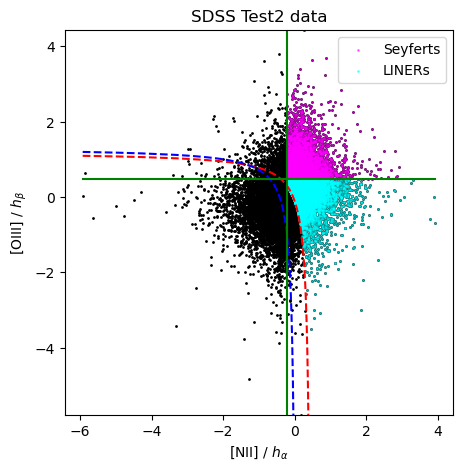

In [60]:
plt.figure(figsize=(5,5))
plt.scatter(nii_ha, oiii_hb, c='k', s=1)
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

plt.scatter(nii_ha[agn][sey], oiii_hb[agn][sey], c='magenta', s=1, alpha=0.5, label='Seyferts')
plt.scatter(nii_ha[agn][liner], oiii_hb[agn][liner], c='cyan', s=1, alpha=0.5, label='LINERs')
plt.ylim(min(oiii_hb), max(oiii_hb))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.legend()
plt.show()

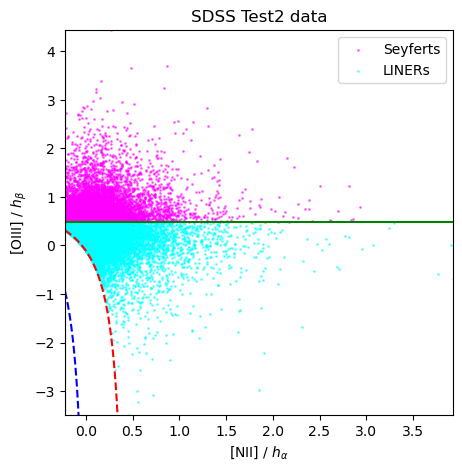

In [61]:
# same image, more precise
plt.figure(figsize=(5,5))
plt.scatter(nii_ha[agn][sey], oiii_hb[agn][sey], c='magenta', s=1, alpha=0.5, label='Seyferts')
plt.scatter(nii_ha[agn][liner], oiii_hb[agn][liner], c='cyan', s=1, alpha=0.5, label='LINERs')
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

plt.xlim(min(nii_ha[agn][sey]), max(nii_ha[agn]))
plt.ylim(min(oiii_hb[agn][liner]), max(oiii_hb[agn][sey]))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.legend()
plt.show()

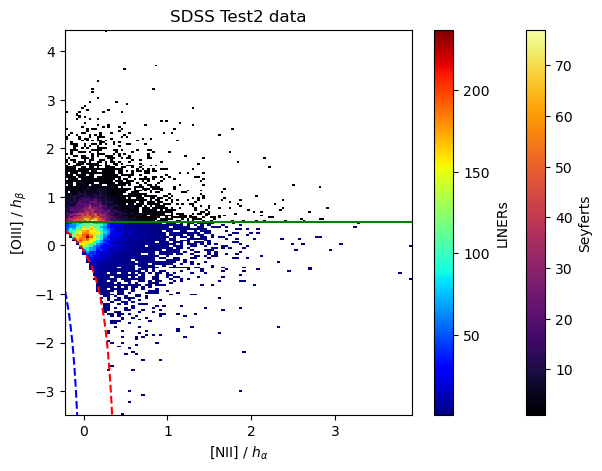

In [62]:
fig = plt.figure(figsize=(7,5))
h_sey = plt.hist2d(x=nii_ha[agn][sey], y=oiii_hb[agn][sey], bins=100, cmin=1, cmap='inferno', label='Seyferts')
fig.colorbar(h_sey[3], ax=plt.gca(), label='Seyferts')
h_liner = plt.hist2d(x=nii_ha[agn][liner], y=oiii_hb[agn][liner], bins=100, cmin=1, cmap='jet', label='LINERs')
fig.colorbar(h_liner[3], ax=plt.gca(), label='LINERs')

plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

plt.xlim(min(nii_ha[agn][sey]), max(nii_ha[agn]))
plt.ylim(min(oiii_hb[agn][liner]), max(oiii_hb[agn][sey]))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.show()

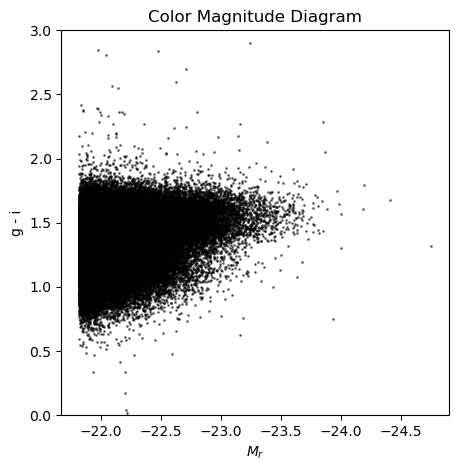

In [63]:
# CMD
g = data['petroMag_g']
i = data['petroMag_i']
g_i = g - i

plt.figure(figsize=(5,5))
plt.scatter(Mr, g_i, c='k', s=1, alpha=0.5)
plt.gca().invert_xaxis()
plt.ylim(0, 3)
plt.xlabel('$M_r$')
plt.ylabel('g - i')
plt.title('Color Magnitude Diagram')
plt.show()

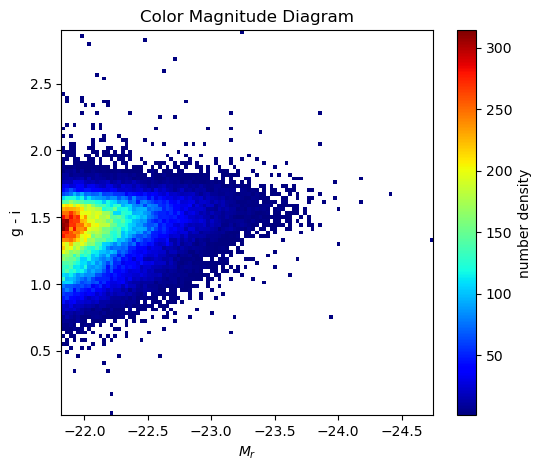

In [64]:
plt.figure(figsize=(6,5))
plt.xlabel('$M_r$')
plt.ylabel('g - i')
plt.title('Color Magnitude Diagram')
gi1 = g_i > 0
gi2 = g_i < 3
gi_0_3 = gi1 & gi2
h_cmd = plt.hist2d(x=Mr[gi_0_3], y=g_i[gi_0_3], bins=100, cmin=1, cmap='jet', label='number density')
plt.gca().invert_xaxis()
fig.colorbar(h_cmd[3], ax=plt.gca(), label='number density')

plt.show()

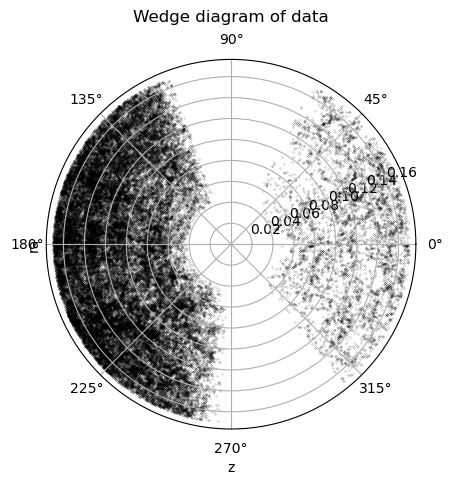

In [65]:
# Binning

# Wedge diagram
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(ra * np.pi / 180, z, marker='.', color='black', s=0.1, alpha=0.75)

# ax.set_rmin(0.00)
# ax.set_rmax(0.10)

ax.set_xlabel("z")
ax.set_ylabel("ra")
ax.set_title("Wedge diagram of data", va='bottom')
plt.show()

In [66]:
z = data['z']

binned = [0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16]
binning = 0.001
for i in binned:
    z_1 = z > i - binning
    z_2 = z < i + binning
    z_t = z_1 & z_2
    globals()['z{}_bin'.format(int(i * 100))] = z_t
    globals()['z{}'.format(int(i * 100))] = data[z_t]

print(len(z2), len(z4), len(z6), len(z8), len(z10), len(z12), len(z14), len(z16))

0 0 343 829 884 1448 2058 2432


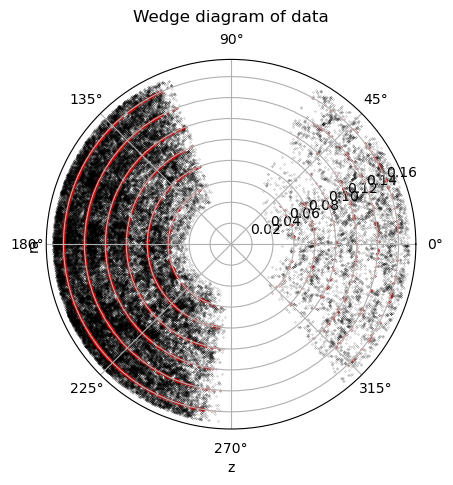

In [67]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(ra * np.pi / 180, z, marker='.', color='black', s=0.1, alpha=0.75)
for i in binned:
    ax.scatter(ra[globals()['z{}_bin'.format(int(i * 100))]] * np.pi / 180, z[globals()['z{}_bin'.format(int(i * 100))]],
               marker='.', color='red', s=0.1, alpha=0.75, label=f'z = {i}')

# ax.set_rmin(0.00)
# ax.set_rmax(0.10)

ax.set_xlabel("z")
ax.set_ylabel("ra")
ax.set_title("Wedge diagram of data", va='bottom')
# plt.legend()
plt.show()

In [73]:
z = data['z']
z_agn = data['z'][agn]
z_sey = data['z'][agn][sey]
z_liner = data['z'][agn][liner]

binned_final = [0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17]
binning_final = 0.005
for i in binned_final:
    z_1_final = z >= i - binning_final
    z_2_final = z < i + binning_final
    z_t_final = z_1_final & z_2_final
    globals()['z{}_bin_final'.format(int(i * 100))] = z_t_final
    globals()['z{}_final'.format(int(i * 100))] = data[z_t_final]
    
    z_agn_1_final = z_agn >= i - binning_final
    z_agn_2_final = z_agn < i + binning_final
    z_agn_t_final = z_agn_1_final & z_agn_2_final
    globals()['z{}_agn_bin_final'.format(int(i * 100))] = z_agn_t_final
    globals()['z{}_agn_final'.format(int(i * 100))] = data[agn][z_agn_t_final]
    
    z_sey_1_final = z_sey >= i - binning_final
    z_sey_2_final = z_sey < i + binning_final
    z_sey_t_final = z_sey_1_final & z_sey_2_final
    globals()['z{}_sey_bin_final'.format(int(i * 100))] = z_sey_t_final
    globals()['z{}_sey_final'.format(int(i * 100))] = data[agn][sey][z_sey_t_final]
    
    z_liner_1_final = z_liner >= i - binning_final
    z_liner_2_final = z_liner < i + binning_final
    z_liner_t_final = z_liner_1_final & z_liner_2_final
    globals()['z{}_liner_bin_final'.format(int(i * 100))] = z_liner_t_final
    globals()['z{}_liner_final'.format(int(i * 100))] = data[agn][liner][z_liner_t_final]

for j in binned_final:
    print(f"bin center {j} with +/- {binning_final} : {len(globals()['z{}_final'.format(int(j * 100))])}")

bin center 0.04 with +/- 0.005 : 81
bin center 0.05 with +/- 0.005 : 826
bin center 0.06 with +/- 0.005 : 1719
bin center 0.07 with +/- 0.005 : 2892
bin center 0.08 with +/- 0.005 : 4095
bin center 0.09 with +/- 0.005 : 4046
bin center 0.1 with +/- 0.005 : 4629
bin center 0.11 with +/- 0.005 : 6215
bin center 0.12 with +/- 0.005 : 7543
bin center 0.13 with +/- 0.005 : 9372
bin center 0.14 with +/- 0.005 : 10343
bin center 0.15 with +/- 0.005 : 11562
bin center 0.16 with +/- 0.005 : 12619
bin center 0.17 with +/- 0.005 : 6576


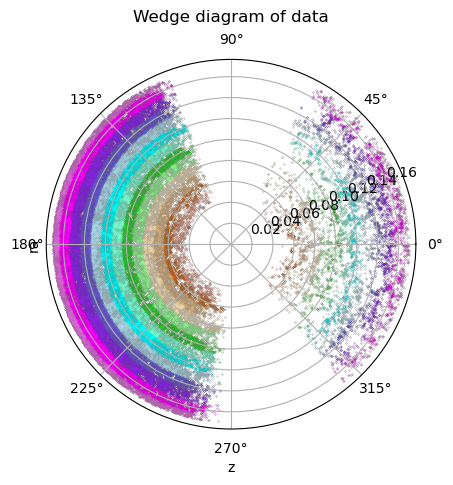

In [74]:
coloring = ['indianred', 'darksalmon', 'chocolate', 'burlywood', 'wheat', 'palegreen',
            'limegreen', 'aquamarine', 'aqua', 'lightblue', 'slateblue', 'blueviolet',
            'magenta', 'orchid', 'deeppink', 'crimson']

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(ra * np.pi / 180, z, marker='.', color='black', s=0.1, alpha=0.75)
n = 0
for i in binned_final:
    ax.scatter(ra[globals()['z{}_bin_final'.format(int(i * 100))]] * np.pi / 180, z[globals()['z{}_bin_final'.format(int(i * 100))]],
               marker='.', color=coloring[n], s=0.1, alpha=0.75, label=f'z = {i}')
    n += 1

# ax.set_rmin(0.00)
# ax.set_rmax(0.10)

ax.set_xlabel("z")
ax.set_ylabel("ra")
ax.set_title("Wedge diagram of data", va='bottom')
# plt.legend()
plt.show()

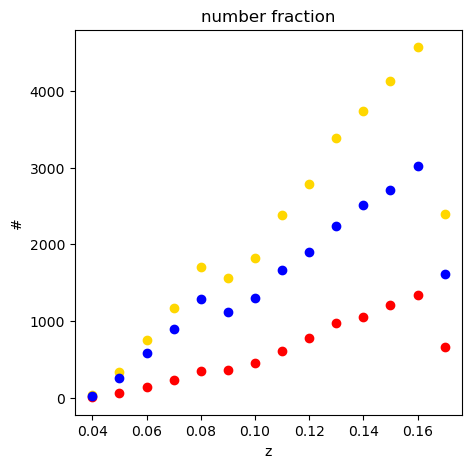

In [75]:
plt.figure(figsize=(5,5))
for i in binned_final:
    # plt.plot(i, len(globals()['z{}_final'.format(int(i * 100))]),
    #          marker='o', color='gray', label='all')
    plt.plot(i, len(globals()['z{}_agn_final'.format(int(i * 100))]),
             marker='o', color='gold', label='AGN')
    plt.plot(i, len(globals()['z{}_sey_final'.format(int(i * 100))]),
             marker='o', color='red', label='Seyfert')
    plt.plot(i, len(globals()['z{}_liner_final'.format(int(i * 100))]),
             marker='o', color='blue', label='LINER')
plt.xlabel('z')
plt.ylabel('#')
plt.title('number fraction')
# plt.legend()
plt.show()

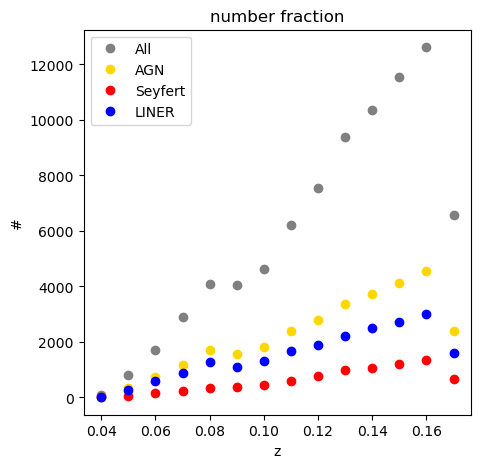

In [76]:
frac_all = [binned_final, []]
frac_agn = [binned_final, []]
frac_sey = [binned_final, []]
frac_liner = [binned_final, []]
for i in binned_final:
    frac_all[1].append(len(globals()['z{}_final'.format(int(i * 100))]))
    frac_agn[1].append(len(globals()['z{}_agn_final'.format(int(i * 100))]))
    frac_sey[1].append(len(globals()['z{}_sey_final'.format(int(i * 100))]))
    frac_liner[1].append(len(globals()['z{}_liner_final'.format(int(i * 100))]))

plt.figure(figsize=(5,5))
plt.plot(frac_all[0], frac_all[1], marker='o', ls='', color='gray', label='All')
plt.plot(frac_agn[0], frac_agn[1], marker='o', ls='', color='gold', label='AGN')
plt.plot(frac_sey[0], frac_sey[1], marker='o', ls='', color='red', label='Seyfert')
plt.plot(frac_liner[0], frac_liner[1], marker='o', ls='', color='blue', label='LINER')

plt.xlabel('z')
plt.ylabel('#')
plt.title('number fraction')
plt.legend()
plt.show()

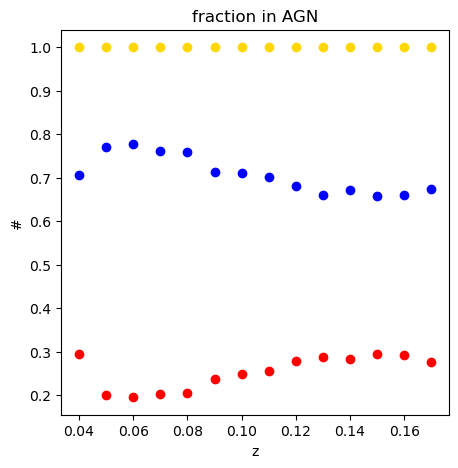

In [84]:
plt.figure(figsize=(5,5))
for i in binned_final:
    sum_agn = len(globals()['z{}_agn_final'.format(int(i * 100))])
    # plt.plot(i, len(globals()['z{}_final'.format(int(i * 100))]),
    #          marker='o', color='gray', label='all')
    plt.plot(i, len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_agn,
             marker='o', color='gold', label='AGN')
    plt.plot(i, len(globals()['z{}_sey_final'.format(int(i * 100))]) / sum_agn,
             marker='o', color='red', label='Seyfert')
    plt.plot(i, len(globals()['z{}_liner_final'.format(int(i * 100))]) / sum_agn,
             marker='o', color='blue', label='LINER')
plt.xlabel('z')
plt.ylabel('#')
plt.title('fraction in AGN')
# plt.legend()
plt.show()

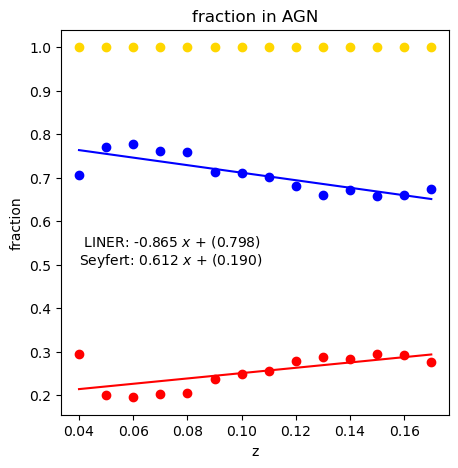

In [85]:
# fiducial line (curve fit)
frac_agn_agn = [binned_final, []]
frac_sey_agn = [binned_final, []]
frac_liner_agn = [binned_final, []]
for i in binned_final:
    sum_agn = len(globals()['z{}_agn_final'.format(int(i * 100))])
    # plt.plot(i, len(globals()['z{}_final'.format(int(i * 100))]),
    #          marker='o', color='gray', label='all')
    frac_agn_agn[1].append(len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_agn)
    frac_sey_agn[1].append(len(globals()['z{}_sey_final'.format(int(i * 100))]) / sum_agn)
    frac_liner_agn[1].append(len(globals()['z{}_liner_final'.format(int(i * 100))]) / sum_agn)

frac_agn_agn = np.array(frac_agn_agn)
frac_sey_agn = np.array(frac_sey_agn)
frac_liner_agn = np.array(frac_liner_agn)

def f(x, a, b):
    return a * x + b

popt_sey, pcov_sey = curve_fit(f, frac_sey_agn[0], frac_sey_agn[1])
popt_liner, pcov_liner = curve_fit(f, frac_liner_agn[0], frac_liner_agn[1])

plt.figure(figsize=(5,5))
plt.plot(frac_agn_agn[0], frac_agn_agn[1], marker='o', ls='', color='gold', label='AGN')
plt.plot(frac_sey_agn[0], frac_sey_agn[1], marker='o', ls='', color='red', label='Seyfert')
plt.plot(frac_liner_agn[0], frac_liner_agn[1], marker='o', ls='', color='blue', label='LINER')

plt.plot(frac_sey_agn[0], f(frac_sey_agn[0], popt_sey[0], popt_sey[1]), 'r-')
plt.plot(frac_liner_agn[0], f(frac_liner_agn[0], popt_liner[0], popt_liner[1]), 'b-')
plt.xlabel('z')
plt.ylabel('fraction')
plt.title('fraction in AGN')
plt.text(0.04, 0.5, f' LINER: {popt_liner[0]:.3f} $x$ + ({popt_liner[1]:.3f})\n\
Seyfert: {popt_sey[0]:.3f} $x$ + ({popt_sey[1]:.3f})')
# plt.legend()
plt.show()

percent : 0.41975308641975306
percent : 0.4116222760290557
percent : 0.4374636416521233
percent : 0.40560165975103735
percent : 0.41684981684981687
percent : 0.38680177953534356
percent : 0.39425361849211493
percent : 0.3831053901850362
percent : 0.36868619912501654
percent : 0.3611822449850619
percent : 0.36130716426568693
percent : 0.35668569451651966
percent : 0.3618353276804818
percent : 0.3651155717761557


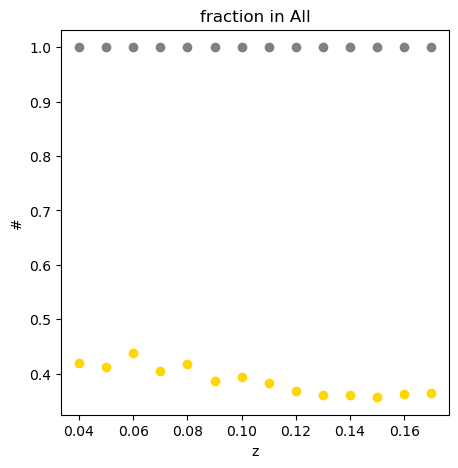

In [86]:
plt.figure(figsize=(5,5))
for i in binned_final:
    sum_all = len(globals()['z{}_final'.format(int(i * 100))])
    plt.plot(i, len(globals()['z{}_final'.format(int(i * 100))]) / sum_all,
             marker='o', color='gray', label='all')
    plt.plot(i, len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_all,
             marker='o', color='gold', label='AGN')
    print(f"percent : {len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_all}")
    # plt.plot(i, len(globals()['z{}_sey_final'.format(int(i * 100))]) / sum_all,
    #          marker='o', color='red', label='Seyfert')
    # plt.plot(i, len(globals()['z{}_liner_final'.format(int(i * 100))]) / sum_all,
    #          marker='o', color='blue', label='LINER')
plt.xlabel('z')
plt.ylabel('#')
plt.title('fraction in All')
# plt.legend()
plt.show()

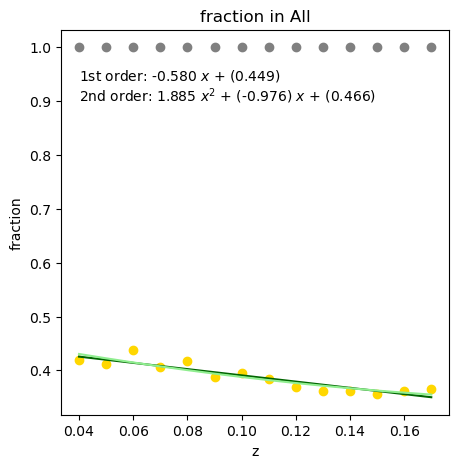

In [87]:
# fiducial line (curve fit)
frac_all_all = [binned_final, []]
frac_agn_all = [binned_final, []]
for i in binned_final:
    sum_all = len(globals()['z{}_final'.format(int(i * 100))])
    # plt.plot(i, len(globals()['z{}_final'.format(int(i * 100))]),
    #          marker='o', color='gray', label='all')
    frac_all_all[1].append(len(globals()['z{}_final'.format(int(i * 100))]) / sum_all)
    frac_agn_all[1].append(len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_all)

frac_all_all = np.array(frac_all_all)
frac_agn_all = np.array(frac_agn_all)

def f(x, a, b):
    return a * x + b

def f2(x, a, b, c):
    return a * x ** 2 + b * x + c

popt_agn, pcov_agn = curve_fit(f, frac_agn_all[0], frac_agn_all[1])
popt_agn2, pcov_agn2 = curve_fit(f2, frac_agn_all[0], frac_agn_all[1])

plt.figure(figsize=(5,5))
plt.plot(frac_all_all[0], frac_all_all[1], marker='o', ls='', color='gray', label='All')
plt.plot(frac_agn_all[0], frac_agn_all[1], marker='o', ls='', color='gold', label='AGN')

plt.plot(frac_agn_all[0], f(frac_agn_all[0], popt_agn[0], popt_agn[1]), c='darkgreen')
plt.plot(frac_agn_all[0], f2(frac_agn_all[0], popt_agn2[0], popt_agn2[1], popt_agn2[2]), c='lightgreen')
plt.xlabel('z')
plt.ylabel('fraction')
plt.title('fraction in All')
plt.text(0.04, 0.9, f'1st order: {popt_agn[0]:.3f} $x$ + ({popt_agn[1]:.3f})\n\
2nd order: {popt_agn2[0]:.3f} $x^2$ + ({popt_agn2[1]:.3f}) $x$ + ({popt_agn2[2]:.3f})')
# plt.legend()
plt.show()

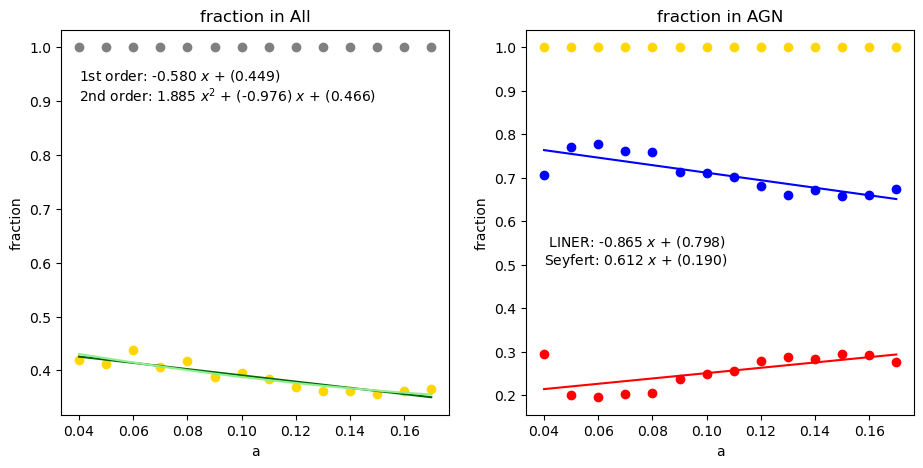

In [88]:
# All in one

# fiducial line (curve fit)
frac_all_all = [binned_final, []]
frac_agn_all = [binned_final, []]

frac_agn_agn = [binned_final, []]
frac_sey_agn = [binned_final, []]
frac_liner_agn = [binned_final, []]

for i in binned_final:
    sum_all = len(globals()['z{}_final'.format(int(i * 100))])
    frac_all_all[1].append(len(globals()['z{}_final'.format(int(i * 100))]) / sum_all)
    frac_agn_all[1].append(len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_all)
    
    sum_agn = len(globals()['z{}_agn_final'.format(int(i * 100))])
    frac_agn_agn[1].append(len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_agn)
    frac_sey_agn[1].append(len(globals()['z{}_sey_final'.format(int(i * 100))]) / sum_agn)
    frac_liner_agn[1].append(len(globals()['z{}_liner_final'.format(int(i * 100))]) / sum_agn)

frac_all_all = np.array(frac_all_all)
frac_agn_all = np.array(frac_agn_all)

frac_agn_agn = np.array(frac_agn_agn)
frac_sey_agn = np.array(frac_sey_agn)
frac_liner_agn = np.array(frac_liner_agn)

def f(x, a, b):
    return a * x + b

def f2(x, a, b, c):
    return a * x ** 2 + b * x + c

popt_agn, pcov_agn = curve_fit(f, frac_agn_all[0], frac_agn_all[1])
popt_agn2, pcov_agn2 = curve_fit(f2, frac_agn_all[0], frac_agn_all[1])

popt_sey, pcov_sey = curve_fit(f, frac_sey_agn[0], frac_sey_agn[1])
popt_liner, pcov_liner = curve_fit(f, frac_liner_agn[0], frac_liner_agn[1])


# plot
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(frac_all_all[0], frac_all_all[1], marker='o', ls='', color='gray', label='All')
ax0.plot(frac_agn_all[0], frac_agn_all[1], marker='o', ls='', color='gold', label='AGN')
ax0.plot(frac_agn_all[0], f(frac_agn_all[0], popt_agn[0], popt_agn[1]), c='darkgreen')
ax0.plot(frac_agn_all[0], f2(frac_agn_all[0], popt_agn2[0], popt_agn2[1], popt_agn2[2]), c='lightgreen')
ax0.text(0.04, 0.9, f'1st order: {popt_agn[0]:.3f} $x$ + ({popt_agn[1]:.3f})\n\
2nd order: {popt_agn2[0]:.3f} $x^2$ + ({popt_agn2[1]:.3f}) $x$ + ({popt_agn2[2]:.3f})')

ax0.set_xlabel('z')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')

ax1.plot(frac_agn_agn[0], frac_agn_agn[1], marker='o', ls='', color='gold', label='AGN')
ax1.plot(frac_sey_agn[0], frac_sey_agn[1], marker='o', ls='', color='red', label='Seyfert')
ax1.plot(frac_liner_agn[0], frac_liner_agn[1], marker='o', ls='', color='blue', label='LINER')
ax1.plot(frac_sey_agn[0], f(frac_sey_agn[0], popt_sey[0], popt_sey[1]), 'r-')
ax1.plot(frac_liner_agn[0], f(frac_liner_agn[0], popt_liner[0], popt_liner[1]), 'b-')
ax1.text(0.04, 0.5, f' LINER: {popt_liner[0]:.3f} $x$ + ({popt_liner[1]:.3f})\n\
Seyfert: {popt_sey[0]:.3f} $x$ + ({popt_sey[1]:.3f})')

ax1.set_xlabel('z')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')

# plt.legend()
plt.show()

In [91]:
# x-axis: z -> a

z_a = 1 / (1 + np.array(z))
z_agn_a = 1 / (1 + np.array(z_agn))
z_sey_a = 1 / (1 + np.array(z_sey))
z_liner_a = 1 / (1 + np.array(z_liner))

binned_a = 1 / (1 + np.array(binned_final))
binning_a = (binned_a[0] - binned_a[1]) / 2
for i in binned_a:
    z_1_a = z_a >= i - binning_a
    z_2_a = z_a < i + binning_a
    z_t_a = z_1_a & z_2_a
    globals()['z{}_bin_a'.format(int(i * 1000))] = z_t_a
    globals()['z{}_a'.format(int(i * 1000))] = z_a[z_t_a]
    
    z_agn_1_a = z_agn_a >= i - binning_a
    z_agn_2_a = z_agn_a < i + binning_a
    z_agn_t_a = z_agn_1_a & z_agn_2_a
    globals()['z{}_agn_bin_a'.format(int(i * 1000))] = z_agn_t_a
    globals()['z{}_agn_a'.format(int(i * 1000))] = z_agn_a[z_agn_t_a]
    
    z_sey_1_a = z_sey_a >= i - binning_a
    z_sey_2_a = z_sey_a < i + binning_a
    z_sey_t_a = z_sey_1_a & z_sey_2_a
    globals()['z{}_sey_bin_a'.format(int(i * 1000))] = z_sey_t_a
    globals()['z{}_sey_a'.format(int(i * 1000))] = z_sey_a[z_sey_t_a]
    
    z_liner_1_a = z_liner_a >= i - binning_a
    z_liner_2_a = z_liner_a < i + binning_a
    z_liner_t_a = z_liner_1_a & z_liner_2_a
    globals()['z{}_liner_bin_a'.format(int(i * 1000))] = z_liner_t_a
    globals()['z{}_liner_a'.format(int(i * 1000))] = z_liner_a[z_liner_t_a]

for j in binned_a:
    print(f"bin center {j} with +/- {binning_a} : {len(globals()['z{}_a'.format(int(j * 1000))])}")

bin center 0.9615384615384615 with +/- 0.0045787545787545625 : 80
bin center 0.9523809523809523 with +/- 0.0045787545787545625 : 844
bin center 0.9433962264150942 with +/- 0.0045787545787545625 : 1752
bin center 0.9345794392523364 with +/- 0.0045787545787545625 : 3028
bin center 0.9259259259259258 with +/- 0.0045787545787545625 : 4369
bin center 0.9174311926605504 with +/- 0.0045787545787545625 : 4429
bin center 0.9090909090909091 with +/- 0.0045787545787545625 : 5116
bin center 0.9009009009009008 with +/- 0.0045787545787545625 : 7093
bin center 0.8928571428571428 with +/- 0.0045787545787545625 : 8699
bin center 0.8849557522123894 with +/- 0.0045787545787545625 : 10919
bin center 0.8771929824561403 with +/- 0.0045787545787545625 : 12345
bin center 0.8695652173913044 with +/- 0.0045787545787545625 : 13951
bin center 0.8620689655172414 with +/- 0.0045787545787545625 : 15615
bin center 0.8547008547008548 with +/- 0.0045787545787545625 : 8293


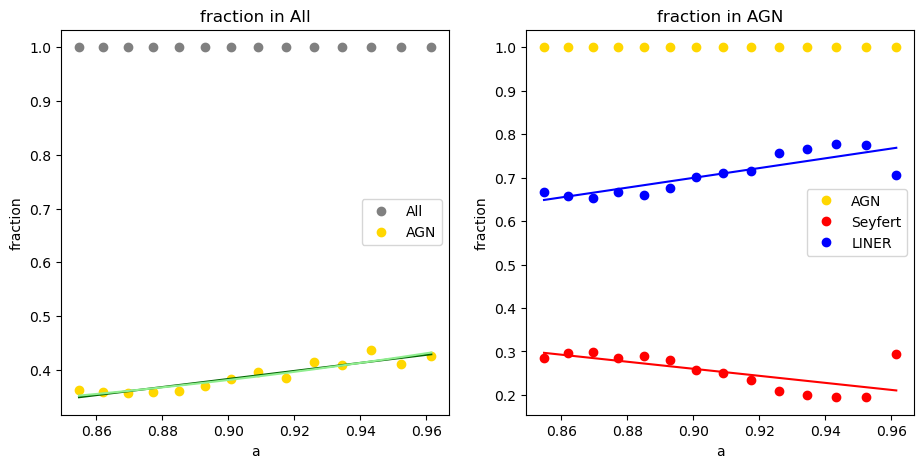

In [95]:
# x-axis: z -> a
# All in one

# fiducial line (curve fit)
afrac_all_all = [binned_a, []]
afrac_agn_all = [binned_a, []]

afrac_agn_agn = [binned_a, []]
afrac_sey_agn = [binned_a, []]
afrac_liner_agn = [binned_a, []]

for i in binned_a:
    asum_all = len(globals()['z{}_a'.format(int(i * 1000))])
    afrac_all_all[1].append(len(globals()['z{}_a'.format(int(i * 1000))]) / asum_all)
    afrac_agn_all[1].append(len(globals()['z{}_agn_a'.format(int(i * 1000))]) / asum_all)
    
    asum_agn = len(globals()['z{}_agn_a'.format(int(i * 1000))])
    afrac_agn_agn[1].append(len(globals()['z{}_agn_a'.format(int(i * 1000))]) / asum_agn)
    afrac_sey_agn[1].append(len(globals()['z{}_sey_a'.format(int(i * 1000))]) / asum_agn)
    afrac_liner_agn[1].append(len(globals()['z{}_liner_a'.format(int(i * 1000))]) / asum_agn)

afrac_all_all = np.array(afrac_all_all)
afrac_agn_all = np.array(afrac_agn_all)

afrac_agn_agn = np.array(afrac_agn_agn)
afrac_sey_agn = np.array(afrac_sey_agn)
afrac_liner_agn = np.array(afrac_liner_agn)

def f(x, a, b):
    return a * x + b

def f2(x, a, b, c):
    return a * x ** 2 + b * x + c

popt_agn_a, pcov_agn_a = curve_fit(f, afrac_agn_all[0], afrac_agn_all[1])
popt_agn2_a, pcov_agn2_a = curve_fit(f2, afrac_agn_all[0], afrac_agn_all[1])

popt_sey_a, pcov_sey_a = curve_fit(f, afrac_sey_agn[0], afrac_sey_agn[1])
popt_liner_a, pcov_liner_a = curve_fit(f, afrac_liner_agn[0], afrac_liner_agn[1])


# plot
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(afrac_all_all[0], afrac_all_all[1], marker='o', ls='', color='gray', label='All')
ax0.plot(afrac_agn_all[0], afrac_agn_all[1], marker='o', ls='', color='gold', label='AGN')
ax0.plot(afrac_agn_all[0], f(afrac_agn_all[0], popt_agn[0], popt_agn[1]), c='darkgreen')
ax0.plot(afrac_agn_all[0], f2(afrac_agn_all[0], popt_agn2[0], popt_agn2[1], popt_agn2[2]), c='lightgreen')
# ax0.text(0.02, 0.9, f'1st order: {popt_agn[0]:.3f} $x$ + ({popt_agn[1]:.3f})\n\
# 2nd order: {popt_agn2[0]:.3f} $x^2$ + ({popt_agn2[1]:.3f}) $x$ + ({popt_agn2[2]:.3f})')

ax0.set_xlabel('a')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')
ax0.legend()

ax1.plot(afrac_agn_agn[0], afrac_agn_agn[1], marker='o', ls='', color='gold', label='AGN')
ax1.plot(afrac_sey_agn[0], afrac_sey_agn[1], marker='o', ls='', color='red', label='Seyfert')
ax1.plot(afrac_liner_agn[0], afrac_liner_agn[1], marker='o', ls='', color='blue', label='LINER')
ax1.plot(afrac_sey_agn[0], f(afrac_sey_agn[0], popt_sey[0], popt_sey[1]), 'r-')
ax1.plot(afrac_liner_agn[0], f(afrac_liner_agn[0], popt_liner[0], popt_liner[1]), 'b-')
# ax1.text(0.02, 0.5, f' LINER: {popt_liner[0]:.3f} $x$ + ({popt_liner[1]:.3f})\n\
# Seyfert: {popt_sey[0]:.3f} $x$ + ({popt_sey[1]:.3f})')

ax1.set_xlabel('a')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')
ax1.legend()

plt.show()

In [96]:
# chi-square test
# function: chi-square
def chi2(x, y, line, std):
    chi_s = np.sum(((y - line) / std) ** 2)
    return chi_s

x_agn = np.array(frac_agn_all[0])
y_agn = np.array(frac_agn_all[1])
line_agn = f(frac_agn_all[0], popt_agn[0], popt_agn[1])
std_agn = np.std(y_agn - line_agn)
chi_agn = chi2(x_agn, y_agn, line_agn, std_agn) / (len(x_agn) - 2)

x_sey = np.array(frac_sey_agn[0])
y_sey = np.array(frac_sey_agn[1])
line_sey = f(frac_sey_agn[0], popt_sey[0], popt_sey[1])
std_sey = np.std(y_sey - line_sey)
chi_sey = chi2(x_sey, y_sey, line_sey, std_sey) / (len(x_sey) - 2)

x_liner = np.array(frac_liner_agn[0])
y_liner = np.array(frac_liner_agn[1])
line_liner = f(frac_liner_agn[0], popt_liner[0], popt_liner[1])
std_liner = np.std(y_liner - line_liner)
chi_liner = chi2(x_liner, y_liner, line_liner, std_liner) / (len(x_liner) - 2)

print(f"[z]\nagn chi2 : {chi_agn}\nsey chi2 : {chi_sey}\nliner chi2 : {chi_liner}")

x_agn_a = np.array(afrac_agn_all[0])
y_agn_a = np.array(afrac_agn_all[1])
line_agn_a = f(afrac_agn_all[0], popt_agn_a[0], popt_agn_a[1])
std_agn_a = np.std(y_agn_a - line_agn_a)
chi_agn_a = chi2(x_agn_a, y_agn_a, line_agn_a, std_agn_a) / (len(x_agn_a) - 2)

x_sey_a = np.array(afrac_sey_agn[0])
y_sey_a = np.array(afrac_sey_agn[1])
line_sey_a = f(afrac_sey_agn[0], popt_sey_a[0], popt_sey_a[1])
std_sey_a = np.std(y_sey_a - line_sey_a)
chi_sey_a = chi2(x_sey_a, y_sey_a, line_sey_a, std_sey_a) / (len(x_sey_a) - 2)

x_liner_a = np.array(afrac_liner_agn[0])
y_liner_a = np.array(afrac_liner_agn[1])
line_liner_a = f(afrac_liner_agn[0], popt_liner_a[0], popt_liner_a[1])
std_liner_a = np.std(y_liner_a - line_liner_a)
chi_liner_a = chi2(x_liner_a, y_liner_a, line_liner_a, std_liner_a) / (len(x_liner_a) - 2)

print(f"[a]\nagn chi2 : {chi_agn_a}\nsey chi2 : {chi_sey_a}\nliner chi2 : {chi_liner_a}")

[z]
agn chi2 : 142.11068777877207
sey chi2 : 122.39035946228462
liner chi2 : 137.23266398952515
[a]
agn chi2 : 1.1666666666666665
sey chi2 : 1.1666666666666665
liner chi2 : 1.1666666666666672


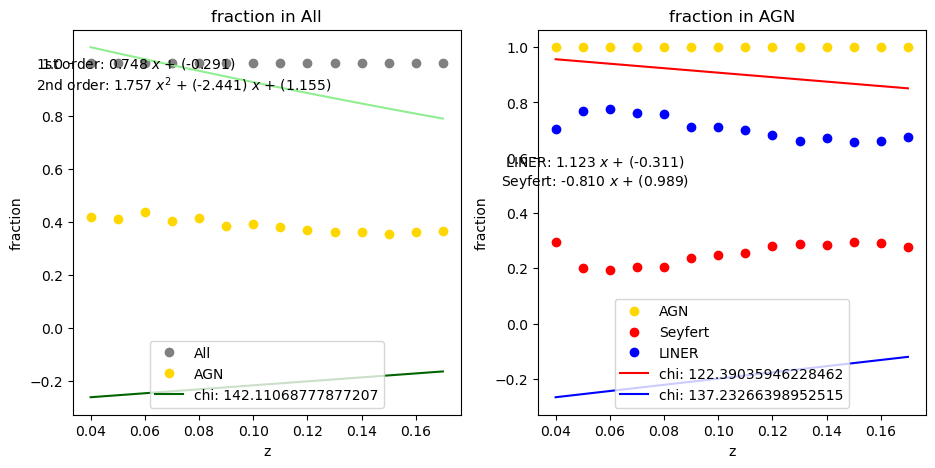

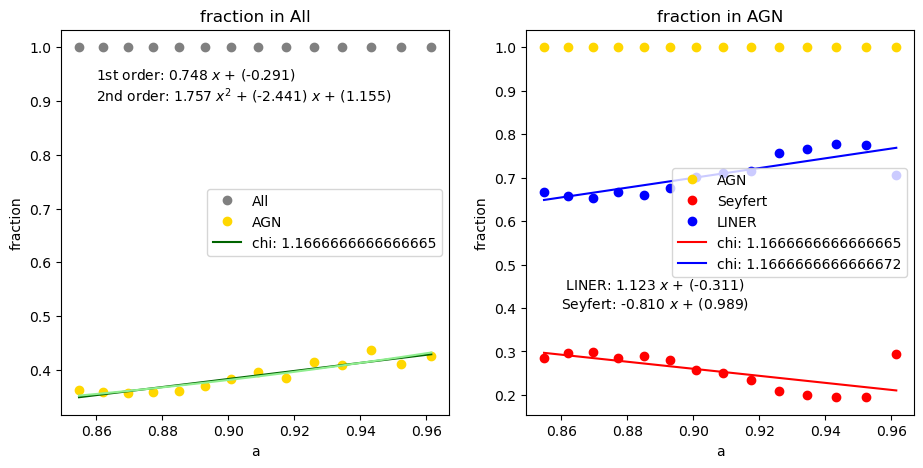

In [97]:
# plot
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(frac_all_all[0], frac_all_all[1], marker='o', ls='', color='gray', label=f'All')
ax0.plot(frac_agn_all[0], frac_agn_all[1], marker='o', ls='', color='gold', label='AGN')
ax0.plot(frac_agn_all[0], f(frac_agn_all[0], popt_agn[0], popt_agn[1]), c='darkgreen', label=f'chi: {chi_agn}')
ax0.plot(frac_agn_all[0], f2(frac_agn_all[0], popt_agn2[0], popt_agn2[1], popt_agn2[2]), c='lightgreen')
ax0.text(0.02, 0.9, f'1st order: {popt_agn[0]:.3f} $x$ + ({popt_agn[1]:.3f})\n\
2nd order: {popt_agn2[0]:.3f} $x^2$ + ({popt_agn2[1]:.3f}) $x$ + ({popt_agn2[2]:.3f})')

ax0.set_xlabel('z')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')
ax0.legend()

ax1.plot(frac_agn_agn[0], frac_agn_agn[1], marker='o', ls='', color='gold', label='AGN')
ax1.plot(frac_sey_agn[0], frac_sey_agn[1], marker='o', ls='', color='red', label='Seyfert')
ax1.plot(frac_liner_agn[0], frac_liner_agn[1], marker='o', ls='', color='blue', label='LINER')
ax1.plot(frac_sey_agn[0], f(frac_sey_agn[0], popt_sey[0], popt_sey[1]), 'r-', label=f'chi: {chi_sey}')
ax1.plot(frac_liner_agn[0], f(frac_liner_agn[0], popt_liner[0], popt_liner[1]), 'b-', label=f'chi: {chi_liner}')
ax1.text(0.02, 0.5, f' LINER: {popt_liner[0]:.3f} $x$ + ({popt_liner[1]:.3f})\n\
Seyfert: {popt_sey[0]:.3f} $x$ + ({popt_sey[1]:.3f})')

ax1.set_xlabel('z')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')
ax1.legend()

plt.show()


# plot
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(afrac_all_all[0], afrac_all_all[1], marker='o', ls='', color='gray', label='All')
ax0.plot(afrac_agn_all[0], afrac_agn_all[1], marker='o', ls='', color='gold', label='AGN')
ax0.plot(afrac_agn_all[0], f(afrac_agn_all[0], popt_agn_a[0], popt_agn_a[1]), c='darkgreen', label=f'chi: {chi_agn_a}')
ax0.plot(afrac_agn_all[0], f2(afrac_agn_all[0], popt_agn2_a[0], popt_agn2_a[1], popt_agn2_a[2]), c='lightgreen')
ax0.text(0.86, 0.9, f'1st order: {popt_agn_a[0]:.3f} $x$ + ({popt_agn_a[1]:.3f})\n\
2nd order: {popt_agn2_a[0]:.3f} $x^2$ + ({popt_agn2_a[1]:.3f}) $x$ + ({popt_agn2_a[2]:.3f})')

ax0.set_xlabel('a')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')
ax0.legend()

ax1.plot(afrac_agn_agn[0], afrac_agn_agn[1], marker='o', ls='', color='gold', label='AGN')
ax1.plot(afrac_sey_agn[0], afrac_sey_agn[1], marker='o', ls='', color='red', label='Seyfert')
ax1.plot(afrac_liner_agn[0], afrac_liner_agn[1], marker='o', ls='', color='blue', label='LINER')
ax1.plot(afrac_sey_agn[0], f(afrac_sey_agn[0], popt_sey_a[0], popt_sey_a[1]), 'r-', label=f'chi: {chi_sey_a}')
ax1.plot(afrac_liner_agn[0], f(afrac_liner_agn[0], popt_liner_a[0], popt_liner_a[1]), 'b-', label=f'chi: {chi_liner_a}')
ax1.text(0.86, 0.4, f' LINER: {popt_liner_a[0]:.3f} $x$ + ({popt_liner_a[1]:.3f})\n\
Seyfert: {popt_sey_a[0]:.3f} $x$ + ({popt_sey_a[1]:.3f})')

ax1.set_xlabel('a')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')
ax1.legend()

plt.show()

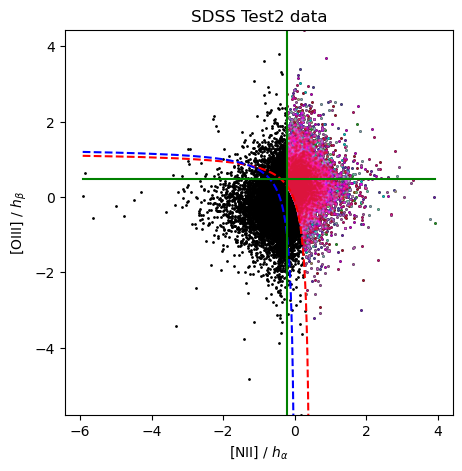

In [ ]:
# z binning in BPT
plt.figure(figsize=(5,5))
plt.scatter(nii_ha, oiii_hb, c='k', s=1)
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')
n = 0
for i in binned_final:
    plt.scatter(nii_ha[agn][sey][globals()['z{}_sey_bin_final'.format(int(i * 100))]],
                oiii_hb[agn][sey][globals()['z{}_sey_bin_final'.format(int(i * 100))]],
                c=coloring[n], s=1, alpha=0.5, label='Seyferts in z=0.02')
    plt.scatter(nii_ha[agn][liner][globals()['z{}_liner_bin_final'.format(int(i * 100))]],
                oiii_hb[agn][liner][globals()['z{}_liner_bin_final'.format(int(i * 100))]],
                c=coloring[n], s=1, alpha=0.5, label='LINERs in')
    n += 1
plt.ylim(min(oiii_hb), max(oiii_hb))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
# plt.legend()
plt.show()

In [ ]:
# # z binning in BPT
# n = 0
# for i in binned_final:
#     plt.figure(figsize=(5,5))
#     plt.scatter(nii_ha, oiii_hb, c='k', s=1)
#     plt.plot(x_nii_ha, y_nii_ha, 'r--')
#     plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
#     plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
#     plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

#     plt.scatter(nii_ha[agn][sey][globals()['z{}_sey_bin_final'.format(int(i * 100))]],
#                 oiii_hb[agn][sey][globals()['z{}_sey_bin_final'.format(int(i * 100))]],
#                 c=coloring[n], s=1, alpha=0.5, label='Seyferts in z=0.02')
#     plt.scatter(nii_ha[agn][liner][globals()['z{}_liner_bin_final'.format(int(i * 100))]],
#                 oiii_hb[agn][liner][globals()['z{}_liner_bin_final'.format(int(i * 100))]],
#                 c=coloring[n], s=1, alpha=0.5, label='LINERs in')
#     n += 1
#     plt.ylim(min(oiii_hb), max(oiii_hb))

#     plt.xlabel(r'[NII] / $h_{\alpha}$')
#     plt.ylabel(r'[OIII] / $h_{\beta}$')
#     plt.title('SDSS Test2 data')
#     # plt.legend()
#     plt.show()